In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [21]:
img = cv2.imread("postit.jpg")

In [22]:
img = cv2.GaussianBlur(img, (5, 5), 0)

In [5]:
squares = []
for gray in cv2.split(img):
    for thrs in range(0, 255, 26
    ):
        if thrs == 0:
            bin = cv2.Canny(gray, 0, 50, apertureSize=5)
            bin = cv2.dilate(bin, None)
        else:
            # 画像二値化
            _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
        # 矩形領域を抽出
        contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
contours

[array([[[ 811, 1201]],
 
        [[ 811, 1202]],
 
        [[ 812, 1201]]], dtype=int32), array([[[1034, 1181]],
 
        [[1035, 1182]],
 
        [[1036, 1182]],
 
        [[1035, 1182]]], dtype=int32), array([[[ 842, 1180]],
 
        [[ 843, 1180]]], dtype=int32), array([[[1029, 1179]]], dtype=int32), array([[[ 847, 1178]],
 
        [[ 846, 1179]],
 
        [[ 845, 1179]],
 
        [[ 847, 1179]],
 
        [[ 848, 1178]],
 
        [[ 851, 1178]]], dtype=int32), array([[[ 824, 1178]],
 
        [[ 823, 1179]],
 
        [[ 820, 1179]],
 
        [[ 819, 1180]],
 
        [[ 818, 1180]],
 
        [[ 817, 1181]],
 
        [[ 813, 1181]],
 
        [[ 811, 1183]],
 
        [[ 810, 1183]],
 
        [[ 809, 1184]],
 
        [[ 809, 1185]],
 
        [[ 808, 1186]],
 
        [[ 808, 1187]],
 
        [[ 807, 1188]],
 
        [[ 807, 1190]],
 
        [[ 807, 1188]],
 
        [[ 811, 1184]],
 
        [[ 812, 1184]],
 
        [[ 813, 1183]],
 
        [[ 814, 1183]],
 
    

In [13]:
for cnt in contours:
            cnt_len = cv2.arcLength(cnt, True)
            cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
            print(cnt_len, cnt)

3.414213538169861 [[[ 812 1201]]

 [[ 811 1201]]

 [[ 811 1202]]]
4.828427076339722 [[[1034 1181]]

 [[1035 1182]]

 [[1036 1182]]

 [[1035 1182]]]
2.0 [[[ 842 1180]]

 [[ 843 1180]]]
0.0 [[[1029 1179]]]
12.828427076339722 [[[ 845 1179]]

 [[ 847 1179]]

 [[ 848 1178]]

 [[ 851 1178]]

 [[ 847 1178]]

 [[ 846 1179]]]
55.455843687057495 [[[ 828 1178]]

 [[ 813 1181]]

 [[ 809 1184]]

 [[ 807 1190]]

 [[ 807 1188]]

 [[ 811 1184]]

 [[ 821 1179]]]
16.0 [[[1133 1176]]

 [[1133 1184]]]
6.0 [[[1134 1162]]

 [[1134 1165]]]
3.414213538169861 [[[ 868 1157]]

 [[ 867 1158]]

 [[ 868 1158]]]
2.0 [[[ 812 1154]]

 [[ 812 1155]]]
15.41421353816986 [[[1135 1151]]

 [[1134 1152]]

 [[1134 1158]]

 [[1135 1158]]]
0.0 [[[ 974 1151]]]
11.656854152679443 [[[ 812 1146]]

 [[ 811 1147]]

 [[ 811 1148]]

 [[ 810 1149]]

 [[ 810 1151]]

 [[ 811 1150]]

 [[ 811 1148]]

 [[ 812 1147]]]
0.0 [[[ 817 1144]]]
0.0 [[[ 931 1140]]]
2.0 [[[1136 1133]]

 [[1136 1134]]]
0.0 [[[ 875 1133]]]
0.0 [[[ 988 1132]]]
0.0 [[[101

In [14]:
cnt

array([[[1139, 1071]],

       [[1138, 1072]],

       [[1138, 1086]],

       [[1139, 1086]]], dtype=int32)

In [15]:
cna = cnt.reshape(-1, 2)

In [16]:
cna

array([[1139, 1071],
       [1138, 1072],
       [1138, 1086],
       [1139, 1086]], dtype=int32)

In [25]:
def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

In [26]:
def find_squares(img):
    # ノイズ除去
    img = cv2.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv2.split(img):
        for thrs in range(0, 255, 26
        ):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize=5)
                bin = cv2.dilate(bin, None)
            else:
                # 画像二値化
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
            # 矩形領域を抽出
            contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    if max_cos < 0.1:
                        squares.append(cnt)
    return squares

In [27]:
squares = find_squares(img)

In [42]:
for square in squares:
    x,y,w,h = cv2.boundingRect(square)
    if 100 <= w <=500 and 100<= h <= 500:
        cropped_img = img[y:y+h, x:x+w]

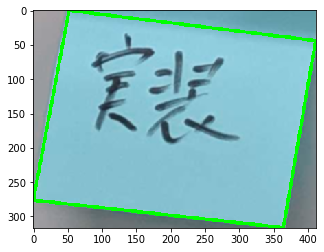

In [43]:
plt.imshow(cropped_img)

In [38]:
x,y,w,h

(0, 0, 4032, 3024)

In [39]:
cut_img = img[y:y+h, x:x+w]

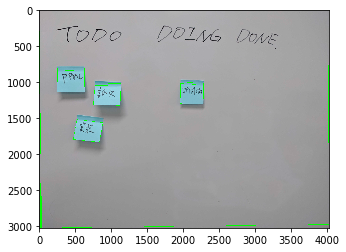

In [41]:
plt.imshow(cut_img)

In [55]:
import glob
img_list = []
SAVE_ROOT = "./static/uploads/"
folder_list = os.listdir(SAVE_ROOT)[::-1]
print(folder_list)
for folder in folder_list:
    text = os.path.join(SAVE_ROOT, folder)
    imgs = glob.glob(text + "/*.jpg")
    img_list.append(imgs)


['2019_10_0810_18_34_', '2019_10_0810_18_44_', '2019_10_0810_18_19_']


In [56]:
img_list

[['./static/uploads/2019_10_0810_18_34_/4.jpg',
  './static/uploads/2019_10_0810_18_34_/5.jpg',
  './static/uploads/2019_10_0810_18_34_/7.jpg',
  './static/uploads/2019_10_0810_18_34_/6.jpg',
  './static/uploads/2019_10_0810_18_34_/2.jpg',
  './static/uploads/2019_10_0810_18_34_/3.jpg',
  './static/uploads/2019_10_0810_18_34_/1.jpg',
  './static/uploads/2019_10_0810_18_34_/0.jpg'],
 ['./static/uploads/2019_10_0810_18_44_/4.jpg',
  './static/uploads/2019_10_0810_18_44_/5.jpg',
  './static/uploads/2019_10_0810_18_44_/7.jpg',
  './static/uploads/2019_10_0810_18_44_/6.jpg',
  './static/uploads/2019_10_0810_18_44_/2.jpg',
  './static/uploads/2019_10_0810_18_44_/3.jpg',
  './static/uploads/2019_10_0810_18_44_/1.jpg',
  './static/uploads/2019_10_0810_18_44_/0.jpg'],
 []]